# Machine Learning Project - Part B - Decision Tree - Q2 & Q3

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# https://www.python-graph-gallery.com/

# Read File - X_test

In [3]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\X_test_F.xlsx"
X_test = pd.read_excel(directory)
X_test = pd.DataFrame(X_test)
X_test

,gender,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,dental caries,tartar,BMI,Blood_Pressure
0,0,60,150,55,103.0,63.0,100.0,242.0,101.0,51.0,170.0,13.3,22.0,16.0,20.0,0,0,24.444444,Optimal
1,0,50,145,55,127.0,75.0,100.0,242.0,89.0,66.0,158.0,15.1,18.0,15.0,17.0,0,1,26.159334,Normal
2,0,60,155,65,110.0,70.0,88.0,214.0,124.0,60.0,129.0,14.1,17.0,15.0,22.0,0,0,27.055151,Optimal
3,1,55,180,85,108.0,74.0,119.0,110.0,155.0,37.0,42.0,13.8,21.0,24.0,35.0,0,0,26.234568,Optimal
4,0,60,150,55,143.0,77.0,101.0,176.0,156.0,58.0,89.0,13.5,42.0,22.0,28.0,0,1,24.444444,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,1,40,175,95,130.0,86.0,92.0,204.0,236.0,36.0,121.0,17.4,25.0,34.0,28.0,0,1,31.020408,Normal High
11135,0,45,155,50,145.0,100.0,99.0,254.0,102.0,80.0,154.0,13.9,19.0,11.0,17.0,0,1,20.811655,High
11136,0,45,165,60,117.0,79.0,87.0,182.0,29.0,60.0,116.0,11.2,28.0,16.0,12.0,0,0,22.038567,Optimal
11137,0,50,150,55,118.0,78.0,93.0,165.0,88.0,51.0,96.0,11.8,19.0,12.0,17.0,0,1,24.444444,Optimal


# Read File - Xy_train

In [4]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\Xy_train_F.xlsx"
df = pd.read_excel(directory)
df = pd.DataFrame(df)
df

,gender,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,dental caries,tartar,BMI,Blood_Pressure,smoking
0,1,45,170,65,140.0,100.0,96.0,222.0,212.0,40.0,140.0,15.4,41.0,68.0,34.0,0,1,22.491349,High,0
1,1,50,170,75,138.0,88.0,92.0,257.0,285.0,52.0,148.0,15.2,38.0,45.0,67.0,0,1,25.951557,Normal High,1
2,1,70,160,70,143.0,76.0,128.0,174.0,120.0,51.0,99.0,15.8,22.0,24.0,43.0,0,1,27.343750,High,1
3,1,35,180,90,120.0,78.0,94.0,213.0,264.0,52.0,108.0,16.1,16.0,31.0,89.0,0,0,27.777778,Normal,1
4,0,50,150,60,128.0,81.0,106.0,180.0,94.0,78.0,91.0,14.0,23.0,19.0,16.0,0,0,26.666667,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,40,160,60,151.0,102.0,100.0,206.0,97.0,64.0,122.0,14.0,20.0,17.0,15.0,0,0,23.437500,High,1
44549,1,35,180,75,132.0,86.0,95.0,203.0,209.0,42.0,119.0,15.9,19.0,21.0,18.0,0,1,23.148148,Normal High,0
44550,1,20,175,60,99.0,50.0,91.0,162.0,64.0,54.0,95.0,15.6,18.0,13.0,18.0,1,1,19.591837,Optimal,1
44551,1,45,160,65,153.0,98.0,99.0,280.0,336.0,53.0,160.0,15.9,37.0,48.0,96.0,1,1,25.390625,High,1


### Show - X_train

In [5]:
X_train = df.drop('smoking', 1)
y_train = df['smoking']
#X_train

### Convert "Blood Pressure" into Dummy 

In [6]:
X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])

### Show Y_train

In [7]:
#y_train

### Print Full Decision Tree

In [20]:
# plt.figure(figsize=(60, 30))
# plot_tree(model, filled=True, class_names=True)
# plt.show()

### Print Part Decision Tree

In [21]:
# plt.figure(figsize=(35, 30))
# plot_tree(model, filled=True, max_depth=5,  fontsize=20)
# plt.show()

# Train - Validation split:

In [8]:

x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

### Grid Search - Parameters

In [9]:
param_grid = {
     'criterion': ['entropy'],
     'max_depth': [30,32,33,34,40,50],            
     'max_features': [4,6,7,13,14,18],        
     'min_samples_leaf': [1,2,3]}     

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=11),
                           param_grid=param_grid,
                           refit=True,
                           cv=10, verbose=3)

In [10]:
# param_grid = {
#      'criterion': ['entropy'],
#      'max_depth': np.arange(20, 51, 1),            # 50
#      'max_features': np.arange(15, 20, 1),         # 19
#      'min_samples_leaf': np.arange(1, 4, 1)}     # 10

# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=11),
#                            param_grid=param_grid,
#                            refit=True,
#                            cv=10, verbose=3)

### Number of Combinations

In [11]:
comb = 1
for list_ in param_grid.values():
    comb *= len(list_)
print("Number of Combinations: ", comb)

Number of Combinations:  108


### Fit The "Grid Search" + Results

In [12]:

grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_
results = pd.DataFrame(grid_search.cv_results_)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.760 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.762 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.758 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.740 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.749 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.754 total time=   0.1s
[CV 7/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.745 total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=30, max_features=4, min_samples_leaf=1;, score=0.761 total time=   0.2s
[CV 9/10] END c

[CV 2/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.748 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.758 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.740 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.749 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.741 total time=   0.3s
[CV 7/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.758 total time=   0.2s
[CV 8/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.749 total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf=2;, score=0.750 total time=   0.2s
[CV 10/10] END criterion=entropy, max_depth=30, max_features=7, min_samples_leaf

[CV 3/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.757 total time=   0.5s
[CV 4/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.746 total time=   0.5s
[CV 5/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.743 total time=   0.5s
[CV 6/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.741 total time=   0.4s
[CV 7/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.740 total time=   0.5s
[CV 8/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.749 total time=   0.4s
[CV 9/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.757 total time=   0.5s
[CV 10/10] END criterion=entropy, max_depth=30, max_features=14, min_samples_leaf=3;, score=0.746 total time=   0.6s
[CV 1/10] END criterion=entropy, max_depth=30, max_features=18, min_sam

[CV 4/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=1;, score=0.763 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=1;, score=0.759 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=1;, score=0.759 total time=   0.1s
[CV 7/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=1;, score=0.763 total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=1;, score=0.744 total time=   0.1s
[CV 9/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=1;, score=0.761 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=1;, score=0.745 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf=2;, score=0.745 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=32, max_features=6, min_samples_leaf

[CV 6/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=2;, score=0.747 total time=   0.3s
[CV 7/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=2;, score=0.746 total time=   0.3s
[CV 8/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=2;, score=0.760 total time=   0.3s
[CV 9/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=2;, score=0.753 total time=   0.3s
[CV 10/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=2;, score=0.737 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=3;, score=0.754 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=3;, score=0.748 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=32, max_features=13, min_samples_leaf=3;, score=0.753 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=32, max_features=13, min_sam

[CV 7/10] END criterion=entropy, max_depth=32, max_features=18, min_samples_leaf=3;, score=0.749 total time=   0.4s
[CV 8/10] END criterion=entropy, max_depth=32, max_features=18, min_samples_leaf=3;, score=0.754 total time=   0.4s
[CV 9/10] END criterion=entropy, max_depth=32, max_features=18, min_samples_leaf=3;, score=0.756 total time=   0.4s
[CV 10/10] END criterion=entropy, max_depth=32, max_features=18, min_samples_leaf=3;, score=0.741 total time=   0.4s
[CV 1/10] END criterion=entropy, max_depth=33, max_features=4, min_samples_leaf=1;, score=0.756 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=33, max_features=4, min_samples_leaf=1;, score=0.756 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=33, max_features=4, min_samples_leaf=1;, score=0.762 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=33, max_features=4, min_samples_leaf=1;, score=0.766 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=33, max_features=4, min_samples_

[CV 9/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=1;, score=0.755 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=1;, score=0.761 total time=   0.1s
[CV 1/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=2;, score=0.753 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=2;, score=0.744 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=2;, score=0.759 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=2;, score=0.739 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=2;, score=0.762 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf=2;, score=0.744 total time=   0.1s
[CV 7/10] END criterion=entropy, max_depth=33, max_features=7, min_samples_leaf

[CV 10/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=2;, score=0.742 total time=   0.4s
[CV 1/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=3;, score=0.756 total time=   0.4s
[CV 2/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=3;, score=0.751 total time=   0.4s
[CV 3/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=3;, score=0.752 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=3;, score=0.747 total time=   0.4s
[CV 5/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=3;, score=0.749 total time=   0.4s
[CV 6/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=3;, score=0.741 total time=   0.4s
[CV 7/10] END criterion=entropy, max_depth=33, max_features=14, min_samples_leaf=3;, score=0.747 total time=   0.3s
[CV 8/10] END criterion=entropy, max_depth=33, max_features=14, min_sam

[CV 1/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.771 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.751 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.759 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.755 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.758 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.757 total time=   0.1s
[CV 7/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.762 total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=1;, score=0.745 total time=   0.1s
[CV 9/10] END criterion=entropy, max_depth=34, max_features=6, min_samples_leaf=

[CV 3/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.757 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.748 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.760 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.753 total time=   0.3s
[CV 7/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.747 total time=   0.2s
[CV 8/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.753 total time=   0.3s
[CV 9/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.751 total time=   0.3s
[CV 10/10] END criterion=entropy, max_depth=34, max_features=13, min_samples_leaf=2;, score=0.739 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=34, max_features=13, min_sam

[CV 4/10] END criterion=entropy, max_depth=34, max_features=18, min_samples_leaf=3;, score=0.744 total time=   0.4s
[CV 5/10] END criterion=entropy, max_depth=34, max_features=18, min_samples_leaf=3;, score=0.734 total time=   0.4s
[CV 6/10] END criterion=entropy, max_depth=34, max_features=18, min_samples_leaf=3;, score=0.751 total time=   0.4s
[CV 7/10] END criterion=entropy, max_depth=34, max_features=18, min_samples_leaf=3;, score=0.749 total time=   0.4s
[CV 8/10] END criterion=entropy, max_depth=34, max_features=18, min_samples_leaf=3;, score=0.756 total time=   0.4s
[CV 9/10] END criterion=entropy, max_depth=34, max_features=18, min_samples_leaf=3;, score=0.742 total time=   0.4s
[CV 10/10] END criterion=entropy, max_depth=34, max_features=18, min_samples_leaf=3;, score=0.738 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=40, max_features=4, min_samples_leaf=1;, score=0.759 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=40, max_features=4, min_sampl

[CV 6/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=1;, score=0.750 total time=   0.1s
[CV 7/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=1;, score=0.756 total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=1;, score=0.740 total time=   0.1s
[CV 9/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=1;, score=0.760 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=1;, score=0.750 total time=   0.1s
[CV 1/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=2;, score=0.748 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=2;, score=0.752 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf=2;, score=0.754 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=40, max_features=7, min_samples_leaf

[CV 7/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=2;, score=0.741 total time=   0.3s
[CV 8/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=2;, score=0.752 total time=   0.3s
[CV 9/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=2;, score=0.745 total time=   0.3s
[CV 10/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=2;, score=0.747 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=3;, score=0.751 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=3;, score=0.757 total time=   0.4s
[CV 3/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=3;, score=0.761 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=40, max_features=14, min_samples_leaf=3;, score=0.741 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=40, max_features=14, min_sam

[CV 8/10] END criterion=entropy, max_depth=50, max_features=4, min_samples_leaf=3;, score=0.738 total time=   0.1s
[CV 9/10] END criterion=entropy, max_depth=50, max_features=4, min_samples_leaf=3;, score=0.738 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=50, max_features=4, min_samples_leaf=3;, score=0.734 total time=   0.1s
[CV 1/10] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=1;, score=0.760 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=1;, score=0.754 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=1;, score=0.768 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=1;, score=0.765 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf=1;, score=0.767 total time=   0.2s
[CV 6/10] END criterion=entropy, max_depth=50, max_features=6, min_samples_leaf

[CV 10/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=1;, score=0.750 total time=   0.5s
[CV 1/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=2;, score=0.746 total time=   0.5s
[CV 2/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=2;, score=0.754 total time=   0.5s
[CV 3/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=2;, score=0.751 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=2;, score=0.751 total time=   0.4s
[CV 5/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=2;, score=0.757 total time=   0.5s
[CV 6/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=2;, score=0.746 total time=   0.5s
[CV 7/10] END criterion=entropy, max_depth=50, max_features=13, min_samples_leaf=2;, score=0.745 total time=   0.4s
[CV 8/10] END criterion=entropy, max_depth=50, max_features=13, min_sam

[CV 1/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.748 total time=   0.8s
[CV 2/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.745 total time=   0.8s
[CV 3/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.749 total time=   0.7s
[CV 4/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.744 total time=   0.8s
[CV 5/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.744 total time=   0.7s
[CV 6/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.754 total time=   0.6s
[CV 7/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.749 total time=   0.5s
[CV 8/10] END criterion=entropy, max_depth=50, max_features=18, min_samples_leaf=3;, score=0.761 total time=   0.5s
[CV 9/10] END criterion=entropy, max_depth=50, max_features=18, min_samp

KeyError: ('max_depth', 'max_features')

In [13]:
model = grid_search.best_estimator_
results = pd.DataFrame(grid_search.cv_results_)
results['max_depth'] = results['params'].apply(lambda x: x['max_depth'])
results['max_features'] = results['params'].apply(lambda x: x['max_features'])
results['min_samples_leaf'] = results['params'].apply(lambda x: x['min_samples_leaf'])


In [14]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,...,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,max_depth,max_features,min_samples_leaf
0,0.220470,0.019188,0.006386,0.000974,entropy,30,4,1,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.760449,...,0.744949,0.760662,0.746352,0.753648,0.752875,0.007071,46,30,4,1
1,0.259011,0.022034,0.007345,0.001052,entropy,30,4,2,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.746424,...,0.744669,0.747194,0.744669,0.722222,0.743617,0.007257,99,30,4,2
2,0.234147,0.023655,0.007051,0.000729,entropy,30,4,3,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.733801,...,0.745230,0.739618,0.732323,0.721661,0.735986,0.006559,108,30,4,3
3,0.287599,0.020182,0.006188,0.001024,entropy,30,6,1,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.768864,...,0.746352,0.751964,0.762907,0.747194,0.758655,0.009728,6,30,6,1
4,0.296986,0.015551,0.006292,0.000803,entropy,30,6,2,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.755119,...,0.737374,0.740180,0.752806,0.750281,0.750126,0.007241,61,30,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.562770,0.040632,0.005692,0.000744,entropy,50,14,2,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.757924,...,0.741302,0.752245,0.745230,0.747194,0.753325,0.008247,39,50,14,2
104,0.589062,0.042887,0.005910,0.001109,entropy,50,14,3,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.751192,...,0.744669,0.750561,0.749719,0.735129,0.747489,0.007621,80,50,14,3
105,0.781200,0.110024,0.006704,0.001103,entropy,50,18,1,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.764376,...,0.751964,0.758698,0.757576,0.756453,0.758571,0.004744,7,50,18,1
106,0.746955,0.061684,0.005611,0.001028,entropy,50,18,2,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.759888,...,0.756173,0.750842,0.760101,0.748316,0.753128,0.005186,41,50,18,2


In [15]:
res_SortedV = results.copy().sort_values('mean_test_score', ascending=False, ignore_index= True)
res_SortedV
TopRes = res_SortedV.loc[:,['max_depth','max_features','min_samples_leaf','std_test_score','mean_test_score']]
TopRes.head(10)


,max_depth,max_features,min_samples_leaf,std_test_score,mean_test_score
0,32,13,1,0.006182,0.761573
1,40,13,1,0.006792,0.760759
2,50,13,1,0.007012,0.760507
3,33,13,1,0.007905,0.760170
4,34,13,1,0.008182,0.759048
5,30,6,1,0.009728,0.758655
6,50,18,1,0.004744,0.758571
7,40,18,1,0.004744,0.758571
8,33,14,1,0.008338,0.758290
9,33,6,1,0.007636,0.758263


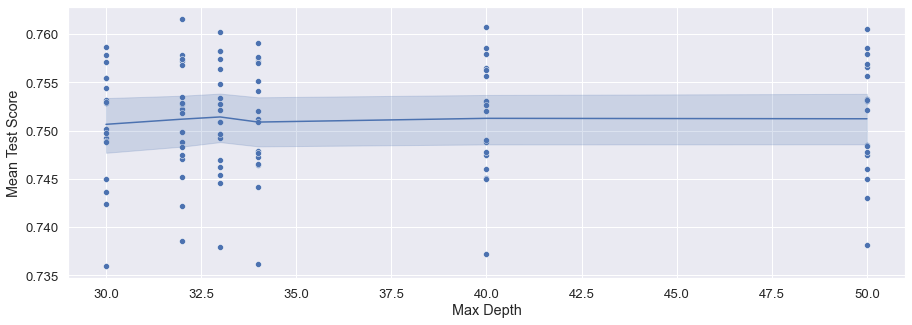

In [16]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.2)
sns.scatterplot(x='max_depth', y='mean_test_score', data=results).set(xlabel='Max Depth', ylabel='Mean Test Score')
sns.lineplot(x='max_depth', y='mean_test_score', data=results)
plt.show()

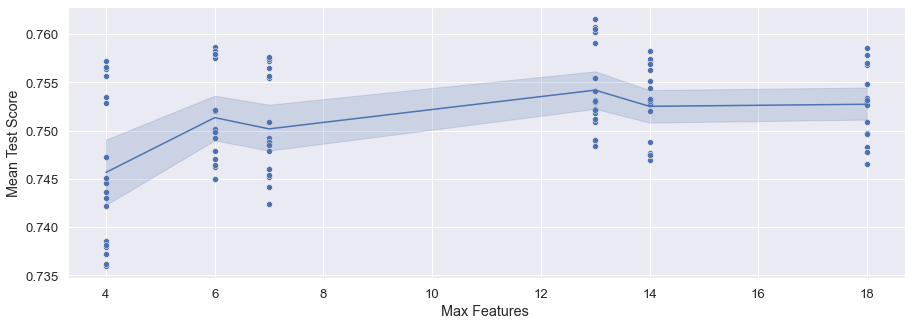

In [17]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.2)
sns.scatterplot(x='max_features', y='mean_test_score', data=results).set(xlabel='Max Features ', ylabel='Mean Test Score')
sns.lineplot(x='max_features', y='mean_test_score', data=results)
plt.show()

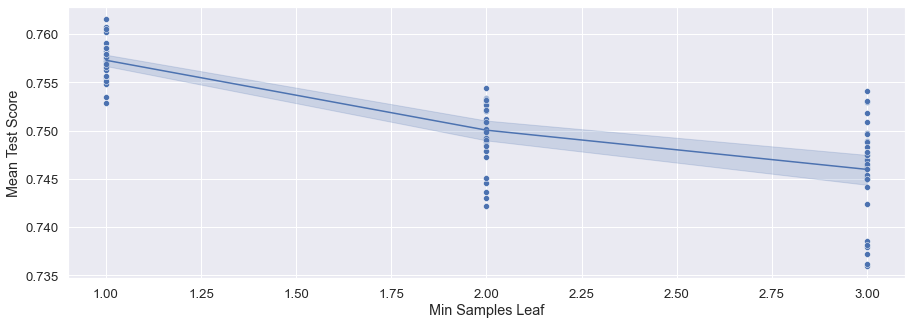

In [18]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.2)
sns.scatterplot(x='min_samples_leaf', y='mean_test_score', data=results).set(xlabel='Min Samples Leaf', ylabel='Mean Test Score')
sns.lineplot(x='min_samples_leaf', y='mean_test_score', data=results)
plt.show()

### Print Accuracy

In [27]:
best_model = grid_search.best_estimator_   # --- > The Best Option.
BP = grid_search.best_params_
print(BP, '\n')      
for i in BP:
    print(i ,"\t: ",BP.get(i) )

print()
print(f"Accuracy on Train: {accuracy_score(y_true=y_train, y_pred=model.predict(x_train))*100:.2f}%")
print(f"Accuracy on Test: {accuracy_score(y_true=y_test, y_pred=model.predict(x_test))*100:.2f}%")

{'criterion': 'entropy', 'max_depth': 32, 'max_features': 13, 'min_samples_leaf': 1} 

criterion 	:  entropy
max_depth 	:  32
max_features 	:  13
min_samples_leaf 	:  1

Accuracy on Train: 99.87%
Accuracy on Test: 77.53%


In [45]:
#imoprt copy()
Q3 = x_test.copy()
Q3['smoking'] = y_test
Q3['pred'] = model.predict(x_test)
Q3 = pd.DataFrame(Q3)

output = r"C:\Users\RoiAz\Machine Learning Project\Part B"
with pd.ExcelWriter(output + "//" + 'X_pred.xlsx') as writer:  
        Q3.to_excel(writer, sheet_name='Main', index=False)
Q3

,gender,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,...,Gtp,dental caries,tartar,BMI,Blood_Pressure_High,Blood_Pressure_Normal,Blood_Pressure_Normal High,Blood_Pressure_Optimal,smoking,pred
31146,0,50,150,50,127.0,76.0,117.0,191.0,44.0,64.0,...,12.0,0,1,22.222222,0,1,0,0,0,0
26591,0,60,160,55,138.0,88.0,94.0,244.0,115.0,67.0,...,19.0,1,0,21.484375,0,0,1,0,0,0
35292,0,60,155,45,119.0,70.0,93.0,182.0,79.0,77.0,...,16.0,1,0,18.730489,0,0,0,1,0,0
16758,1,30,170,80,150.0,90.0,94.0,190.0,48.0,53.0,...,75.0,0,1,27.681661,1,0,0,0,0,0
42408,1,30,175,70,106.0,70.0,98.0,171.0,115.0,50.0,...,18.0,0,1,22.857143,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17710,0,45,165,70,131.0,82.0,105.0,206.0,151.0,60.0,...,105.0,0,0,25.711662,0,0,1,0,0,1
1834,0,45,160,55,138.0,77.0,94.0,203.0,169.0,53.0,...,23.0,1,1,21.484375,0,0,1,0,0,0
25947,1,60,165,60,114.0,72.0,96.0,210.0,83.0,56.0,...,56.0,0,1,22.038567,0,0,0,1,1,1
16049,0,55,160,45,122.0,74.0,101.0,279.0,50.0,74.0,...,18.0,0,0,17.578125,0,1,0,0,0,0


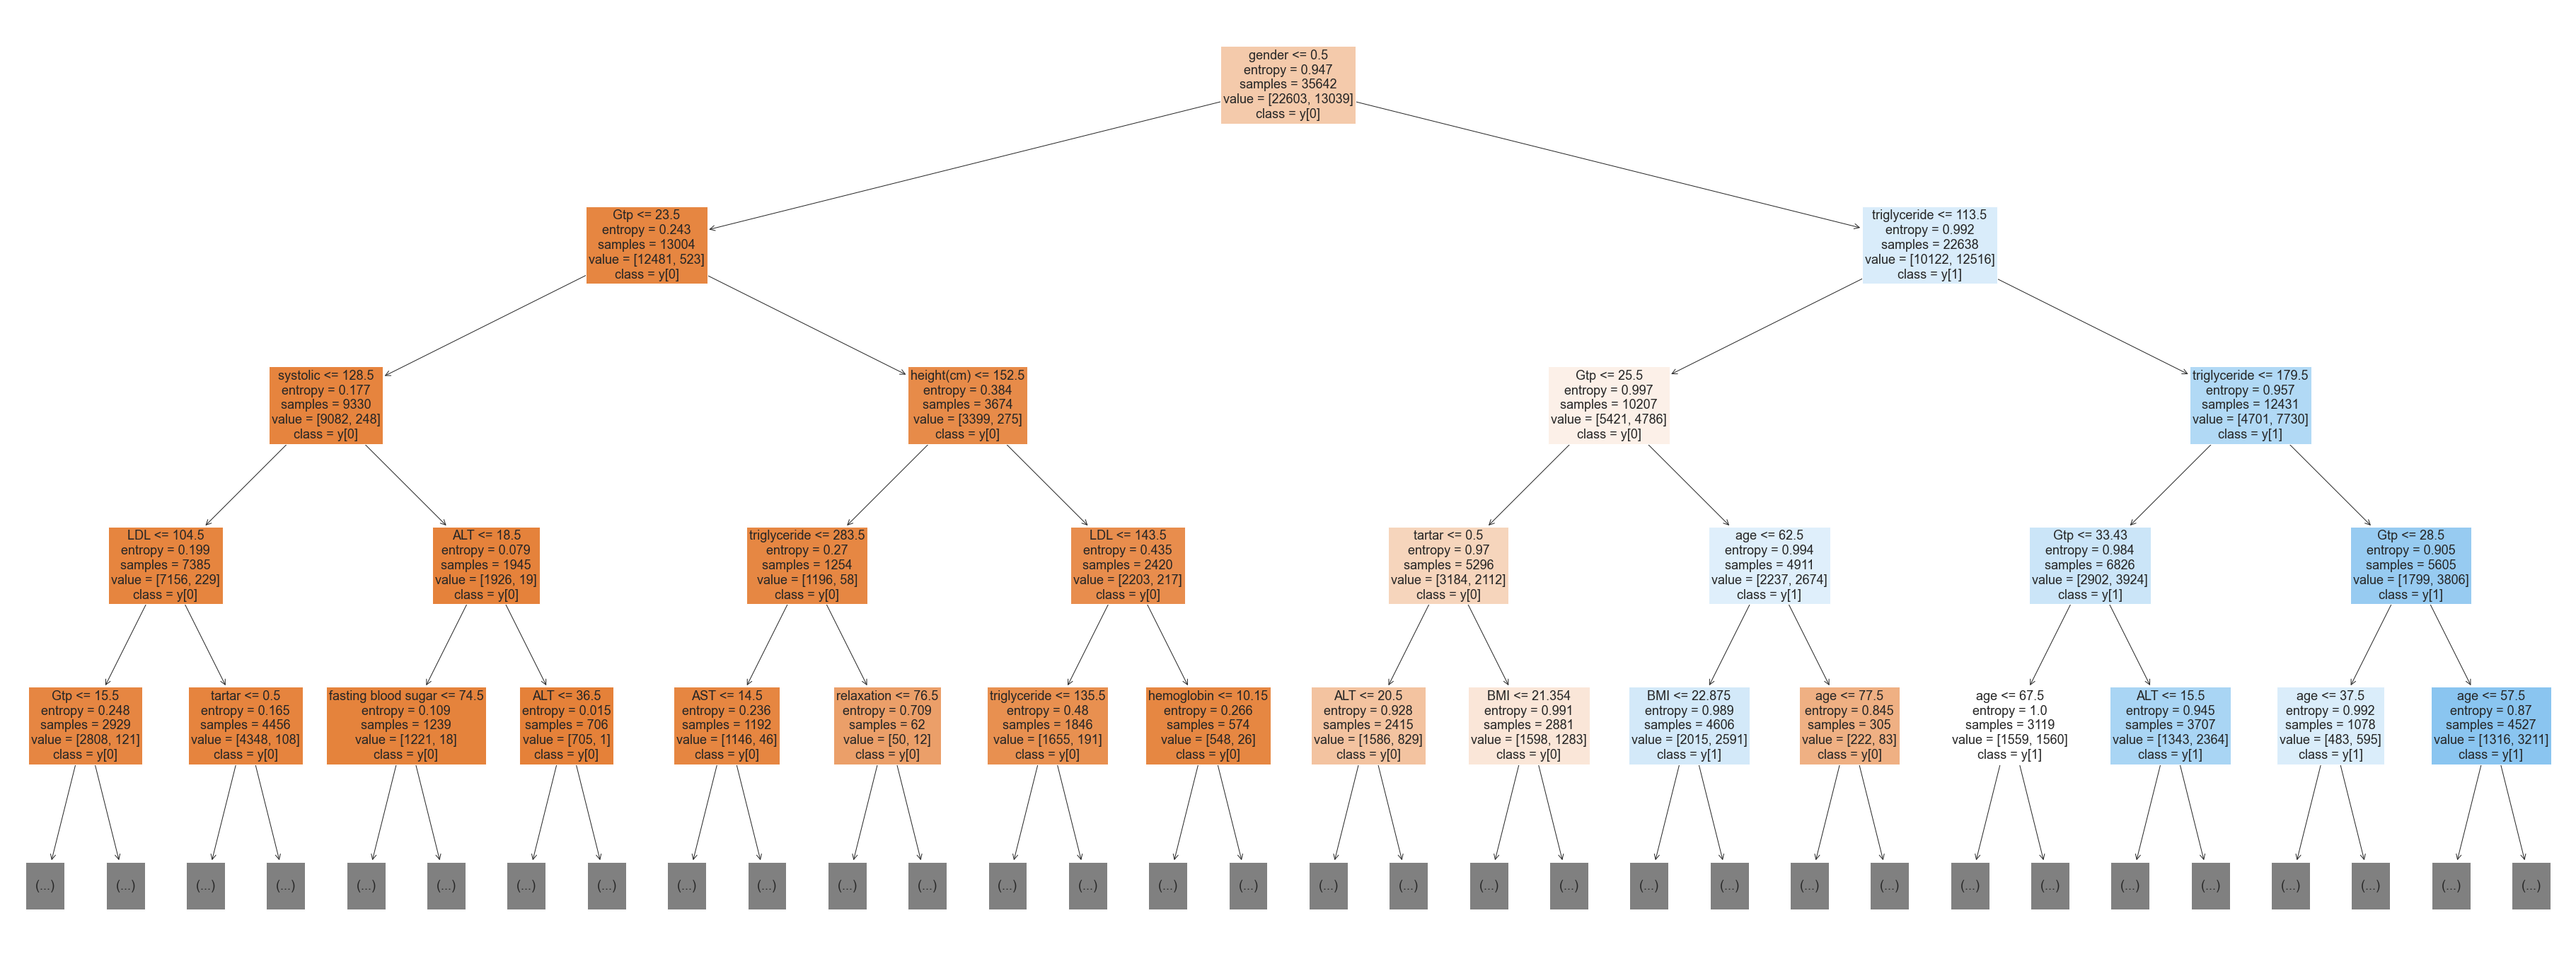

In [20]:
plt.figure(figsize=(65, 25))
plot_tree(model, filled=True, class_names=True,feature_names= X_train.columns, max_depth=4,  fontsize=18)
plt.show()

In [49]:
importances = model.feature_importances_
print(importances)
importances

[0.24220693 0.03380507 0.02066397 0.01976948 0.05293776 0.04645637
 0.05534885 0.0518557  0.07571167 0.05344803 0.05511666 0.05499628
 0.05012389 0.05129672 0.06616054 0.00532768 0.00898803 0.04223044
 0.00166843 0.00571337 0.00311456 0.00305957]


array([0.24220693, 0.03380507, 0.02066397, 0.01976948, 0.05293776,
       0.04645637, 0.05534885, 0.0518557 , 0.07571167, 0.05344803,
       0.05511666, 0.05499628, 0.05012389, 0.05129672, 0.06616054,
       0.00532768, 0.00898803, 0.04223044, 0.00166843, 0.00571337,
       0.00311456, 0.00305957])

In [127]:
importances = modelX.feature_importances_
feature_names = X_train1.columns  # assuming that X is a Pandas DataFrame
for feature, importance in zip(feature_names, importances):
    print(f"Feature:\t {feature},\t \t \t  Importance: {importance}")
    


Feature:	 gender,	 	 	  Importance: 0.23998447267808157
Feature:	 age,	 	 	  Importance: 0.036088888721515826
Feature:	 height(cm),	 	 	  Importance: 0.018253638431383768
Feature:	 weight(kg),	 	 	  Importance: 0.020101260388364867
Feature:	 systolic,	 	 	  Importance: 0.05100549181487749
Feature:	 relaxation,	 	 	  Importance: 0.04915676084251845
Feature:	 fasting blood sugar,	 	 	  Importance: 0.053191875126762836
Feature:	 Cholesterol,	 	 	  Importance: 0.055424555175751504
Feature:	 triglyceride,	 	 	  Importance: 0.07369281044319037
Feature:	 HDL,	 	 	  Importance: 0.05371155913639591
Feature:	 LDL,	 	 	  Importance: 0.05896211375920296
Feature:	 hemoglobin,	 	 	  Importance: 0.05337349176718008
Feature:	 AST,	 	 	  Importance: 0.045330257634075534
Feature:	 ALT,	 	 	  Importance: 0.052368065371126704
Feature:	 Gtp,	 	 	  Importance: 0.0688930913123245
Feature:	 dental caries,	 	 	  Importance: 0.007247145302998024
Feature:	 tartar,	 	 	  Importance: 0.007186234671046355
Feature:	

In [51]:
feature_names = ['gender', 'age', 'height(cm)', 'weight(kg)', 'systolic', 'relaxation',
                 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
                 'hemoglobin', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar', 'BMI',
                 'Blood_Pressure_High', 'Blood_Pressure_Normal', 'Blood_Pressure_Normal High',
                 'Blood_Pressure_Optimal']
importances = [0.24220693, 0.03380507, 0.02066397, 0.01976948, 0.05293776,
       0.04645637, 0.05534885, 0.0518557 , 0.07571167, 0.05344803,
       0.05511666, 0.05499628, 0.05012389, 0.05129672, 0.06616054,
       0.00532768, 0.00898803, 0.04223044, 0.00166843, 0.00571337,
       0.00311456, 0.00305957]

# Create a dataframe with the feature names and importances
df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Print the dataframe


df = df.copy().sort_values('importance', ascending=False, ignore_index= True)
df

,feature,importance
0,gender,0.242207
1,triglyceride,0.075712
2,Gtp,0.066161
3,fasting blood sugar,0.055349
4,LDL,0.055117
5,hemoglobin,0.054996
6,HDL,0.053448
7,systolic,0.052938
8,Cholesterol,0.051856
9,ALT,0.051297


### Decision Tree Parameters

In [57]:
# Shows what is the Parameters of the Decision Tree.

BM = best_model.get_params()
#print(BM, '\n')
for i in BM:
    print(i ,"\t: ",BM.get(i) )

ccp_alpha 	:  0.0
class_weight 	:  None
criterion 	:  entropy
max_depth 	:  32
max_features 	:  13
max_leaf_nodes 	:  None
min_impurity_decrease 	:  0.0
min_samples_leaf 	:  1
min_samples_split 	:  2
min_weight_fraction_leaf 	:  0.0
random_state 	:  11
splitter 	:  best
